# **Importing**

In [1]:
import numpy as np
import sys
import math
from numpy.linalg import norm
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
sign=lambda x:math.copysign(1,x)    #to get the sign of values

# A-Batch Preceptron Algorithm

In [3]:
def batch_perceptron(X,Y,lr=1):
    n=X.shape[1]
    w=np.array([float(random.randrange(-100, 100))/100 for _ in range(X.shape[1])])  #generate random values from (-1,1)
    e=sys.float_info.epsilon       #where epsilon is a very small value approaches 0
    delta=np.ones(n)  #intializing delta with array of ones
    delta_total = []  #our target is delta approching to 0
    w_steps=[]   #weights
    
    count=0 #where count= Number of epochs needed to achieve almost zero error.  
    
    while(norm(delta,1)>e):
        delta=np.zeros(n)
        for i in range(len(X)):
            u=w.dot(X[i])
            if Y[i]*u<=0:
                delta=delta-(Y[i]*X[i])
        delta=delta/len(X)
        
        delta_total.append(norm(delta,1))     #updating delta
        
        w=w-(lr*delta)
        w_steps.append(w)
        count+=1       #return the total number of epochs
        if count>75:    # because of the infinite loop 
            break
        
    return w,w_steps,delta,count,delta_total

# B-Online batch preceptron Algorithm

In [4]:
def online_batch_perceptron(X,Y,lr=1):
    n=X.shape[1]
    data_length=len(X)
    w=np.array([float(random.randrange(-100, 100))/100 for _ in range(X.shape[1])])
    e=sys.float_info.epsilon
    
    delta=np.ones(n)  #intializing delta with array of ones
    delta_total = []  #our target is delta approching to 0

    w_steps=[]
    count=0
    while(norm(delta,1)>e):
        delta=np.zeros(n)
        for i in range(len(X)):
            u=w.dot(X[i])
            if Y[i]*u<=0:
                delta=delta-(Y[i]*X[i])
                delta=delta/data_length
                w=w-(lr*delta)
                w_steps.append(w)
                
        delta_total.append(norm(delta,1))
        count+=1
        if count>75:     # because of the infinite loop 
            break        
    return w,w_steps,count,delta_total

# Problem 1-Batch Perceptron

In [5]:
X=np.array([[50,55,70,80,130,150,155,160],    #x has 2 features
            [1,1,1,1,1,1,1,1]]).T
Y=np.array([1,1,1,1,-1,-1,-1,-1])
w,steps,delta,count, delta_total=batch_perceptron(X,Y)

#printing the values at each run of the random values #output of w,steps and count will differ each time

print (w)          #where w is the weights generated at every run from the random values 
print(len(steps))  #Number of times each algorithm updated model weights.
print(count)           #Number of epochs needed to achieve almost zero error.

[-21.72  15.62]
76
76


### Plotting of Batch Perceptron

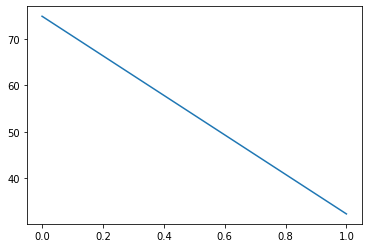

In [6]:
#Plot of deltas (changes in weights).

delta_total = np.unique(delta_total)
plt.plot(np.flip(np.arange(0,len(delta_total))),delta_total)

# Problem 1-Online Batch Perceptron

In [7]:
X=np.array([[50,55,70,80,130,150,155,160],    #x has 2 features
            [1,1,1,1,1,1,1,1]]).T
Y=np.array([1,1,1,1,-1,-1,-1,-1])

w_online,steps_online,count,delta_total=online_batch_perceptron(X,Y)
print (w_online)     #weights
print(len(steps_online))   #Number of times each algorithm updated model weights.  
print(count)    #epochos

#number of epochos and update number has to be different not the same as in case of batch perceptron

[-0.05566406  7.02208984]
113
38


### Plotting of Online Batch Perceptron

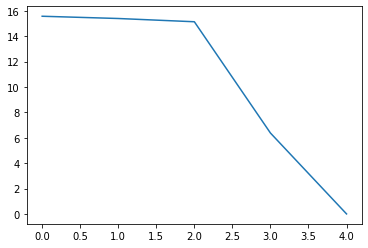

In [8]:
#Plot of deltas (changes in weights).

delta_total = np.unique(delta_total)
plt.plot(np.flip(np.arange(0,len(delta_total))),delta_total)

# Problem 4-Batch Perceptron

In [9]:
#as M here is RGB with 3 features and 1 additional feature (bias) , then it is total of 4 features

M= np.array([[0,255,0,0,255,0,255,255],
             [0,0,255,0,255,255,0,255],
             [0,0,0,255,0,255,255,255],
             [1,1,1,1,1,1,1,1]]).T

N=np.array([1,1,1,-1,1,-1,-1,1])         # Where N is the corrseponding values of M (Y in problem 1)

In [10]:
w,steps,delta,count, delta_total=batch_perceptron(X,Y)

#printing the values at each run of the random values #output of w,steps and count will differ each time

print (w)          #where w is the weights generated at every run from the random values 
print(len(steps))  #Number of times each algorithm updated model weights.
print(count)           #Number of epochs needed to achieve almost zero error.

[-20.58  15.43]
76
76


### Plotting of Batch Perceptron

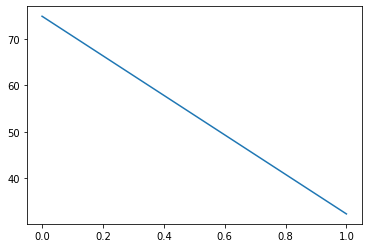

In [11]:
#Plot of deltas (changes in weights).

delta_total = np.unique(delta_total)
plt.plot(np.flip(np.arange(0,len(delta_total))),delta_total)

# Problem 4-Online Batch Perceptron

In [12]:

w_online,steps_online,count,delta_total=online_batch_perceptron(X,Y)
print (w_online)     #weights
print(len(steps_online))   #Number of times each algorithm updated model weights.  
print(count)    #epochos

#number of epochos and update number has to be different not the same as in case of batch perceptron

[-14.94744141  12.24514648]
235
76


### Plotting of Online Batch Perceptron

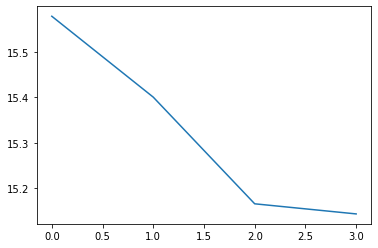

In [13]:
#Plot of deltas (changes in weights).

delta_total = np.unique(delta_total)
plt.plot(np.flip(np.arange(0,len(delta_total))),delta_total)

 # Repeat all the above using the data generated

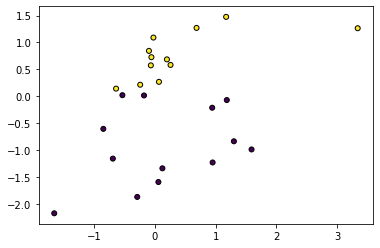

In [14]:
x, y = make_classification(25, n_features=2, n_redundant = 0, n_informative=1, n_clusters_per_class=1)

mask_for_y = y == 0
y[mask_for_y] = - 1

plt.scatter(x[:,0], x[:,1], marker='o', c=y, s=25, edgecolor='k')

 ### Dividing the data into 75% training and 25% testing

In [15]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.25, random_state=0)
# print(trainX, trainY, testX, testY)
lr = np.random.uniform(-1, 1, trainX.shape[1])


 ### For Batch Perceptron Algorithm

In [16]:
w,steps,delta,count, delta_total = batch_perceptron(trainX, trainY)
#printing the values at each run of the random values #output of w,steps and count will differ each time

print ("Weights:",w)          #where w is the weights generated at every run from the random values 
print("No. of times updated weights:",len(steps))  #Number of times each algorithm updated model weights.
print("No. of epochs:",count)           #Number of epochs needed to achieve almost zero error.


for z in trainX:
    sign(w.dot(z))


Weights: [0.05931844 0.60631865]
No. of times updated weights: 3
No. of epochs: 3


 ### For Online Training 

In [17]:
w_online,steps_online,count_online,delta_total_online = online_batch_perceptron(trainX, trainY)
print ("Weights:",w_online)     #weights
print("No. of times updated weights:",len(steps_online))   #Number of times each algorithm updated model weights.  
print("No. of epochs:",count_online)    #epochos

for z in trainX:
    sign(w_online.dot(z))

Weights: [0.01141201 0.13050575]
No. of times updated weights: 18
No. of epochs: 4


 # Calculating Model Accuracy

In [18]:
# train a logistic regression model on the training set
model = LogisticRegression(random_state = 0)  # define model
model.fit(trainX, trainY)   # fit model
yhat = model.predict(testX)  # make predictions
accuracy = accuracy_score(testY, yhat)    # evaluate predictions

print("yhat:", yhat)
print("testY: ", testY)
print('Accuracy: %.3f' % (accuracy * 100))

yhat: [ 1  1 -1 -1  1 -1  1]
testY:  [ 1  1 -1 -1  1 -1  1]
Accuracy: 100.000


# Visualizing The Model

## Batch Perceptron Algorithm

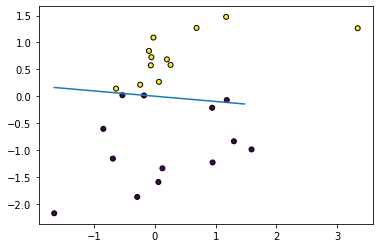

In [19]:
plt.scatter(x[:,0], x[:,1], marker='o', c=y, s=25, edgecolor='k')
xAxis = [ np.min(trainX[:, 0]), np.max(trainX[:, 1])]
yAxis = - np.dot(w[0], xAxis)/ w[1]
plt.plot(xAxis, yAxis)

## Online Training Algorithm

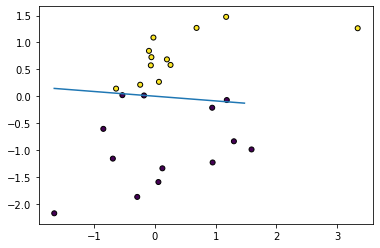

In [20]:
plt.scatter(x[:,0], x[:,1], marker='o', c=y, s=25, edgecolor='k')
xAxis = [ np.min(trainX[:, 0]), np.max(trainX[:, 1])]
yAxis = - np.dot(w_online[0], xAxis)/ w_online[1]
plt.plot(xAxis, yAxis)